In [2]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime, date, time
# import the data offset types
from pandas.tseries.offsets import *
# import common timezones from pytz
from pytz import common_timezones

In [4]:
#請參考 22_Date Datetime.ipynb

In [3]:
# 'foo'會產生error
dti = pd.to_datetime(['Aug 1, 2014', '2014-08-02', '2014.8.3', None, 'foo'],errors="coerce")
dti

DatetimeIndex(['2014-08-01', '2014-08-02', '2014-08-03', 'NaT', 'NaT'], dtype='datetime64[ns]', freq=None)

In [4]:
dates = [datetime(2014, 8, 1), datetime(2014, 8, 2)]
ts = pd.Series(np.random.randn(2), dates)
ts

2014-08-01    0.609063
2014-08-02    0.704055
dtype: float64

In [5]:
# DatetimeIndex
type(ts.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [6]:
type(ts.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
np.random.seed(123456)
periods = pd.date_range('8/1/2014', periods=10)
date_series = pd.Series(np.random.randn(10), index=periods)
date_series

2014-08-01    0.469112
2014-08-02   -0.282863
2014-08-03   -1.509059
2014-08-04   -1.135632
2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
2014-08-08   -1.044236
2014-08-09   -0.861849
2014-08-10   -2.104569
Freq: D, dtype: float64

In [9]:
date_series['2014-08-03':'2014-08-07']

2014-08-03   -1.509059
2014-08-04   -1.135632
2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
Freq: D, dtype: float64

In [11]:
date_series['2014']

2014-08-01    0.469112
2014-08-02   -0.282863
2014-08-03   -1.509059
2014-08-04   -1.135632
2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
2014-08-08   -1.044236
2014-08-09   -0.861849
2014-08-10   -2.104569
Freq: D, dtype: float64

In [10]:
date_series['2014-08']

2014-08-01    0.469112
2014-08-02   -0.282863
2014-08-03   -1.509059
2014-08-04   -1.135632
2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
2014-08-08   -1.044236
2014-08-09   -0.861849
2014-08-10   -2.104569
Freq: D, dtype: float64

In [13]:
# calculate a one day offset from 2014-8-29
d = datetime(2014, 8, 29)
do = pd.DateOffset(days = 1) 
d + do, d-do

(Timestamp('2014-08-30 00:00:00'), Timestamp('2014-08-28 00:00:00'))

In [14]:
# calculate one business day from 2014-8-31
d + BusinessDay()

Timestamp('2014-09-01 00:00:00')

In [15]:
# 2 business days from 2014-8-29
d + 2 * BusinessDay()

Timestamp('2014-09-02 00:00:00')

In [16]:
# what is the next business month end
# from a specific date?
d + BMonthEnd()

Timestamp('2014-09-30 00:00:00')

In [19]:
# calculate the next month end by
# rolling forward from a specific date
BMonthEnd().rollforward(datetime(2014, 9, 15))

Timestamp('2014-09-30 00:00:00')

In [29]:
d - Week(weekday = 1), (d - Week(weekday = 1)).weekday()

(Timestamp('2014-08-26 00:00:00'), 1)

In [22]:
# Anchored Offsets
# calculate all Wednesdays between 2014-06-01
# and 2014-08-31
wednesdays = pd.date_range('2014-06-01','2014-07-31', freq="W-WED")
wednesdays.values, len(wednesdays) 

(array(['2014-06-04T00:00:00.000000000', '2014-06-11T00:00:00.000000000',
        '2014-06-18T00:00:00.000000000', '2014-06-25T00:00:00.000000000',
        '2014-07-02T00:00:00.000000000', '2014-07-09T00:00:00.000000000',
        '2014-07-16T00:00:00.000000000', '2014-07-23T00:00:00.000000000',
        '2014-07-30T00:00:00.000000000'], dtype='datetime64[ns]'), 9)

In [24]:
# Anchored Offsets
# what are all of the business quarterly end dates in 2014?
qends = pd.date_range('2014-01-01', '2014-12-31', freq='BQS-JUN')
qends.values

array(['2014-03-03T00:00:00.000000000', '2014-06-02T00:00:00.000000000',
       '2014-09-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [29]:
#  Period object
aug2014_8 = pd.Period('2014-08', freq='M')
aug2014_8

Period('2014-08', 'M')

In [30]:
aug2014_8.start_time, aug2014_8.end_time

(Timestamp('2014-08-01 00:00:00'), Timestamp('2014-08-31 23:59:59.999999999'))

In [31]:
sep2014_9 = aug2014_8 + 1
sep2014_9

Period('2014-09', 'M')

In [32]:
# Frequency Conversion
periods = 31 * 24#744
#兩小時
twohourly = pd.Series(np.arange(0, periods),pd.date_range('08-01-2014', freq="2H", periods = periods))
twohourly

2014-08-01 00:00:00      0
2014-08-01 02:00:00      1
2014-08-01 04:00:00      2
2014-08-01 06:00:00      3
2014-08-01 08:00:00      4
                      ... 
2014-10-01 14:00:00    739
2014-10-01 16:00:00    740
2014-10-01 18:00:00    741
2014-10-01 20:00:00    742
2014-10-01 22:00:00    743
Freq: 2H, Length: 744, dtype: int32

In [61]:
# 取樣改一天 
# 744/12=62
twohourly.asfreq('D')

2014-08-01      0
2014-08-02     12
2014-08-03     24
2014-08-04     36
2014-08-05     48
             ... 
2014-09-27    684
2014-09-28    696
2014-09-29    708
2014-09-30    720
2014-10-01    732
Freq: D, Length: 62, dtype: int32

In [33]:
#取樣改 一小時
twohourly.asfreq('H')

2014-08-01 00:00:00      0.0
2014-08-01 01:00:00      NaN
2014-08-01 02:00:00      1.0
2014-08-01 03:00:00      NaN
2014-08-01 04:00:00      2.0
                       ...  
2014-10-01 18:00:00    741.0
2014-10-01 19:00:00      NaN
2014-10-01 20:00:00    742.0
2014-10-01 21:00:00      NaN
2014-10-01 22:00:00    743.0
Freq: H, Length: 1487, dtype: float64

In [34]:
# forward fill values
twohourly.asfreq('H', method='ffill')

2014-08-01 00:00:00      0
2014-08-01 01:00:00      0
2014-08-01 02:00:00      1
2014-08-01 03:00:00      1
2014-08-01 04:00:00      2
                      ... 
2014-10-01 18:00:00    741
2014-10-01 19:00:00    741
2014-10-01 20:00:00    742
2014-10-01 21:00:00    742
2014-10-01 22:00:00    743
Freq: H, Length: 1487, dtype: int32

In [66]:
twohourly.asfreq('H', method='bfill')

2014-08-01 00:00:00      0
2014-08-01 01:00:00      1
2014-08-01 02:00:00      1
2014-08-01 03:00:00      2
2014-08-01 04:00:00      2
                      ... 
2014-10-01 18:00:00    741
2014-10-01 19:00:00    742
2014-10-01 20:00:00    742
2014-10-01 21:00:00    743
2014-10-01 22:00:00    743
Freq: H, Length: 1487, dtype: int32

In [35]:
# calculate a random walk five days long at one second intervals
COUNT = 86400*5
np.random.seed(123456)
values = np.random.randn(COUNT)
ws = pd.Series(values)
walk = ws.cumsum()
walk.index = pd.date_range('2014-08-01', periods=len(values), freq="S")
walk

2014-08-01 00:00:00      0.469112
2014-08-01 00:00:01      0.186249
2014-08-01 00:00:02     -1.322810
2014-08-01 00:00:03     -2.458442
2014-08-01 00:00:04     -1.246330
                          ...    
2014-08-05 23:59:55    456.529763
2014-08-05 23:59:56    456.052131
2014-08-05 23:59:57    455.202981
2014-08-05 23:59:58    454.947362
2014-08-05 23:59:59    456.191430
Freq: S, Length: 432000, dtype: float64

In [15]:
# resample to 1 minute
# 抓平均
walk.resample("1Min").mean()

2014-08-01 00:00:00     -8.718220
2014-08-01 00:01:00    -15.239213
2014-08-01 00:02:00     -9.179315
2014-08-01 00:03:00     -8.338307
2014-08-01 00:04:00     -8.129554
                          ...    
2014-08-05 23:55:00    453.773467
2014-08-05 23:56:00    450.857039
2014-08-05 23:57:00    450.078149
2014-08-05 23:58:00    444.637806
2014-08-05 23:59:00    453.837417
Freq: T, Length: 7200, dtype: float64

In [37]:
#check
walk['2014-08-01 00:00'].mean(), walk['2014-08-01 00:03'].mean()

(-8.718220052832644, -8.338306550520219)

In [16]:
# resample to 1 minute
# 抓第一個數
walk.resample("1Min").first()

2014-08-01 00:00:00      0.469112
2014-08-01 00:01:00    -10.886314
2014-08-01 00:02:00    -13.374656
2014-08-01 00:03:00     -7.647693
2014-08-01 00:04:00     -4.482292
                          ...    
2014-08-05 23:55:00    452.900335
2014-08-05 23:56:00    450.062374
2014-08-05 23:57:00    449.582419
2014-08-05 23:58:00    447.243014
2014-08-05 23:59:00    446.877810
Freq: T, Length: 7200, dtype: float64

In [17]:
#2014-07-31 23:59:00開始，不是2014-08-01 00:00:00 
walk.resample("1Min", closed='right').mean()

2014-07-31 23:59:00      0.469112
2014-08-01 00:00:00     -8.907477
2014-08-01 00:01:00    -15.280685
2014-08-01 00:02:00     -9.083865
2014-08-01 00:03:00     -8.285550
                          ...    
2014-08-05 23:55:00    453.726168
2014-08-05 23:56:00    450.849039
2014-08-05 23:57:00    450.039159
2014-08-05 23:58:00    444.631719
2014-08-05 23:59:00    453.955377
Freq: T, Length: 7201, dtype: float64

In [38]:
# show ohlc resampling
walk.resample("D").ohlc()

,open,high,low,close
2014-08-01,0.469112,249.501308,-109.805294,164.996823
2014-08-02,164.060810,425.768781,44.610408,321.261932
2014-08-03,318.744987,568.561151,175.449307,476.248769
2014-08-04,475.708430,712.159121,260.917962,483.435830
2014-08-05,483.539722,624.446110,267.665377,456.191430


In [39]:
# demonstrate the difference between 2, 5 and
# 10 interval rolling windows
h1w = walk['2014-08-01 00:00']
len(h1w)

60

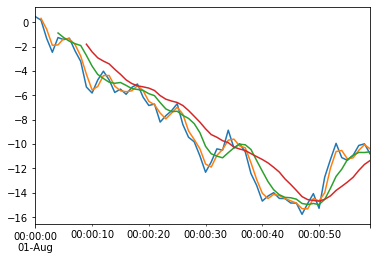

In [41]:
means2 = h1w.rolling(window=2, center=False).mean()
means5 = h1w.rolling(window=5, center=False).mean()
means10 = h1w.rolling(window=10, center=False).mean()
h1w.plot()
means2.plot()
means5.plot()
means10.plot()